In [26]:
# Data Manipulation
import numpy as np
import pandas as pd
from functools import reduce
import re
import json

# Interact with Operating System
import os

# Graphs
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Preprocess and models
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Warnings Configurations
import warnings
warnings.filterwarnings('ignore')

**Steps**
1. Load and Manipulate tweets

**Questions**
1. Could be a good idea try to get all BTC tweets? not only from elon musk
2. In dash try to implemente tath for one user get all the analysis

# 1 Getting data (Tweets)

**You should run this section once**

Twint is an advanced Twitter scraping tool written in Python that allows for scraping Tweets from Twitter profiles without using Twitter's API.

In [2]:
# This is to avoid the loop, i can omit it in spyder
import nest_asyncio
nest_asyncio.apply()

In [3]:
# Delete all files in a directory
def delete_files(path):
    for file in os.listdir(path):
        if os.path.exists(os.path.join(path, file)):
            os.remove(os.path.join(path, file))
    return print("Files: ", os.listdir(path))

In [4]:
import twint

# Get tweets from different users
def scrape_tweets(users, path, date_since, date_until):
    for name in users:
        # Scraping for tweets
        c = twint.Config()
        c.Username = name
        c.Since = date_since 
        c.Until = date_until
        c.Store_csv = True
        c.Output = os.path.join(path, name + ".csv")
        twint.run.Search(c)
    return print("Files: ", os.listdir(path))

In [5]:
# Path and users
path = r"C:\Users\ferro\Desktop\Verano de Investigación\Análisis de Sentimiento\data"
users = ["elonmusk", "bobbyclee"]

In [6]:
# Tweets period
date_since = "2020-01-01"
date_until = "2021-01-01"

In [7]:
# Delete all files in the path
delete_files(path)

PermissionError: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'C:\\Users\\ferro\\Desktop\\Verano de Investigación\\Análisis de Sentimiento\\data\\bobbyclee.csv'

In [ ]:
# Get tweets
scrape_tweets(users, path, date_since, date_until)

# 2 Preprocessing tweets

## 2.1 Formatting variables

In [8]:
# Path and users
path = r"C:\Users\ferro\Desktop\Verano de Investigación\Análisis de Sentimiento\data"

The csv contain all the tweets and retweets since date_since until date_until.

In [9]:
# Reading csv's files and only useful columns
col_useful = ["username", "created_at", "tweet"]
tweets_list = [pd.read_csv(os.path.join(path, file))[col_useful] for file in os.listdir(path)]
tweets_list[0].head()

,username,created_at,tweet
0,bobbyclee,2020-12-29 09:34:49 Hora estándar central (Méx...,Since #Bitcoin can’t be squashed and can’t die...
1,bobbyclee,2020-12-29 09:32:18 Hora estándar central (Méx...,China got started in Jan 2017 (PBOC) when they...
2,bobbyclee,2020-12-29 09:20:15 Hora estándar central (Méx...,The 2017 bull market year was marked by regula...
3,bobbyclee,2020-12-29 08:25:15 Hora estándar central (Méx...,Newbie: what’s the definition of PoS coins?
4,bobbyclee,2020-12-27 10:23:09 Hora estándar central (Méx...,"Five months ago, I put up this challenge to th..."


In [10]:
# Concate tweets data frames
tweets_df = reduce(lambda x, y: pd.concat([x, y], ignore_index = True), tweets_list)
tweets_df.head()

,username,created_at,tweet
0,bobbyclee,2020-12-29 09:34:49 Hora estándar central (Méx...,Since #Bitcoin can’t be squashed and can’t die...
1,bobbyclee,2020-12-29 09:32:18 Hora estándar central (Méx...,China got started in Jan 2017 (PBOC) when they...
2,bobbyclee,2020-12-29 09:20:15 Hora estándar central (Méx...,The 2017 bull market year was marked by regula...
3,bobbyclee,2020-12-29 08:25:15 Hora estándar central (Méx...,Newbie: what’s the definition of PoS coins?
4,bobbyclee,2020-12-27 10:23:09 Hora estándar central (Méx...,"Five months ago, I put up this challenge to th..."


In [11]:
# Rename useful columns
tweets_df.columns = ["user", "date", "tweet"]
tweets_df.head(5)

,user,date,tweet
0,bobbyclee,2020-12-29 09:34:49 Hora estándar central (Méx...,Since #Bitcoin can’t be squashed and can’t die...
1,bobbyclee,2020-12-29 09:32:18 Hora estándar central (Méx...,China got started in Jan 2017 (PBOC) when they...
2,bobbyclee,2020-12-29 09:20:15 Hora estándar central (Méx...,The 2017 bull market year was marked by regula...
3,bobbyclee,2020-12-29 08:25:15 Hora estándar central (Méx...,Newbie: what’s the definition of PoS coins?
4,bobbyclee,2020-12-27 10:23:09 Hora estándar central (Méx...,"Five months ago, I put up this challenge to th..."


In [12]:
# Date type
tweets_df["date"] = pd.to_datetime(tweets_df["date"].apply(lambda text: text[0:19]))
tweets_df.head(5)

,user,date,tweet
0,bobbyclee,2020-12-29 09:34:49,Since #Bitcoin can’t be squashed and can’t die...
1,bobbyclee,2020-12-29 09:32:18,China got started in Jan 2017 (PBOC) when they...
2,bobbyclee,2020-12-29 09:20:15,The 2017 bull market year was marked by regula...
3,bobbyclee,2020-12-29 08:25:15,Newbie: what’s the definition of PoS coins?
4,bobbyclee,2020-12-27 10:23:09,"Five months ago, I put up this challenge to th..."


## 2.2 Clean and Tokenization

Clean and tokenization for all users

In [13]:
# Load stop-words
stop_words = list(stopwords.words('english'))

# Add new stop-words like "it’s" instead of "it's"
new_words = [re.sub("'", "’", word) for word in stop_words if "'" in word]
stop_words.extend(new_words)

In [14]:
def clean_tokenize(text):
    # To lowercase
    new_text = text.lower()
    
    # Drop http web pages
    new_text = re.sub('http\S+', ' ', new_text)
    
    # Drop @users
    new_text = re.sub('@[^\s]+', ' ', new_text)
    
    # Drop punctuation marks
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    new_text = re.sub(regex , ' ', new_text)
    
    # Drop numbers
    new_text = re.sub("\d+", ' ', new_text)
    
    # Drop multiple spaces
    new_text = re.sub("\\s+", ' ', new_text)
    
    # Tokenization
    new_text = new_text.split(sep = ' ')
    
    # Drop token length less than 3 and with a stop-word
    new_text = [token for token in new_text if (len(token) > 2) and (token not in stop_words)]
    
    return(new_text)

In [15]:
# Clean and tokenize tweets
tweets_tokenize = tweets_df.copy()
tweets_tokenize["tweet"] = tweets_tokenize["tweet"].apply(clean_tokenize)
tweets_tokenize.head()

,user,date,tweet
0,bobbyclee,2020-12-29 09:34:49,"[since, bitcoin, can’t, squashed, can’t, die, ..."
1,bobbyclee,2020-12-29 09:32:18,"[china, got, started, jan, pboc, came, knockin..."
2,bobbyclee,2020-12-29 09:20:15,"[bull, market, year, marked, regulatory, actio..."
3,bobbyclee,2020-12-29 08:25:15,"[newbie, what’s, definition, pos, coins]"
4,bobbyclee,2020-12-27 10:23:09,"[five, months, ago, put, challenge, crypto, co..."


In [16]:
# Token in each row, we drop na
tweets_tokenize_explode = tweets_tokenize.explode(column='tweet').reset_index(drop = True).dropna()
tweets_tokenize_explode.head()

,user,date,tweet
0,bobbyclee,2020-12-29 09:34:49,since
1,bobbyclee,2020-12-29 09:34:49,bitcoin
2,bobbyclee,2020-12-29 09:34:49,can’t
3,bobbyclee,2020-12-29 09:34:49,squashed
4,bobbyclee,2020-12-29 09:34:49,can’t


# 3 Exploratory analysis

## 3.1 Month Activity

In [17]:
# Month activity (Number of tweets in the month)
tweets_df["month"] = pd.to_datetime(tweets_df["date"].dt.strftime("%Y-%m"))
tweets_df

,user,date,tweet,month
0,bobbyclee,2020-12-29 09:34:49,Since #Bitcoin can’t be squashed and can’t die...,2020-12-01
1,bobbyclee,2020-12-29 09:32:18,China got started in Jan 2017 (PBOC) when they...,2020-12-01
2,bobbyclee,2020-12-29 09:20:15,The 2017 bull market year was marked by regula...,2020-12-01
3,bobbyclee,2020-12-29 08:25:15,Newbie: what’s the definition of PoS coins?,2020-12-01
4,bobbyclee,2020-12-27 10:23:09,"Five months ago, I put up this challenge to th...",2020-12-01
...,...,...,...,...
3577,elonmusk,2020-01-03 21:33:58,@hot_rod_co @Tesla People talk about the produ...,2020-01-01
3578,elonmusk,2020-01-03 21:25:03,"@slashdot Wow, I built my first server room wi...",2020-01-01
3579,elonmusk,2020-01-01 00:50:06,Congratulations Tesla &amp; SpaceX on great 20...,2020-01-01
3580,elonmusk,2020-01-01 00:33:47,No one suspected his disguise https://t.co/yH...,2020-01-01


<AxesSubplot:xlabel='month'>

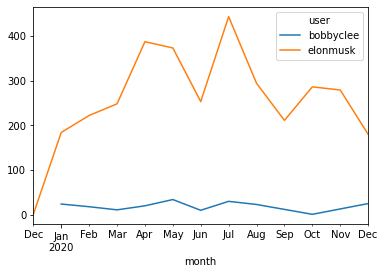

In [18]:
# Month activity for each user 
tweets_df.assign(n = 1).pivot_table(values = "n",  index = "month", columns = "user", aggfunc = np.sum).plot()

In [19]:
tweets_df.assign(n = 1).pivot_table(values = "n",  index = "month", columns = "user", aggfunc = np.sum).head()

user,bobbyclee,elonmusk
month,,
2019-12-01,NaN,1.0
2020-01-01,24.0,184.0
2020-02-01,18.0,222.0
2020-03-01,11.0,248.0
2020-04-01,20.0,387.0


## 3.2 Most Frequent Words

In [20]:
user = "bobbyclee"

<AxesSubplot:xlabel='tweet'>

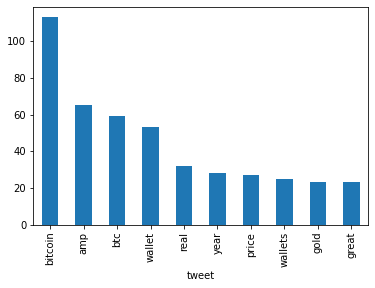

In [21]:
# Plot Top 10 most frequent words
tweets_freq = tweets_tokenize_explode[tweets_tokenize_explode["user"] == user].groupby(by = "tweet")["tweet"].count().sort_values(ascending = False)
tweets_freq[0:10].plot.bar()

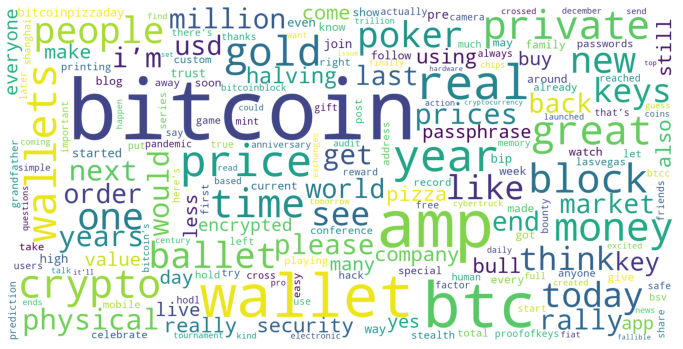

In [22]:
# Plot Word Cloud of tweets frequencies, this class ignore emojis
wordcloud = WordCloud(width = 1600, 
                      height = 800, 
                      max_font_size = 200, 
                      background_color="white").generate_from_frequencies(tweets_freq.to_dict())

# plt the image generated by WordCloud class
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 3.3 Words Average in Tweets

In [23]:
# Tweets words
tweets_tokenize["length_tweet"] = tweets_tokenize["tweet"].apply(len)
tweets_tokenize.groupby(["user"])["length_tweet"].agg([np.mean, np.median, np.std])

,mean,median,std
user,,,
bobbyclee,17.628959,19,8.487310
elonmusk,6.509372,4,6.717425


<AxesSubplot:xlabel='month'>

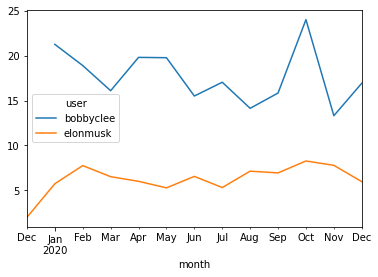

In [24]:
# Words average in each month
tweets_tokenize["month"] = pd.to_datetime(tweets_tokenize["date"].dt.strftime("%Y-%m"))
tweets_tokenize.pivot_table(index = "month", columns = "user", values = "length_tweet", aggfunc = np.mean).plot()

# 4 Sentiment Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the [MIT License] (we sincerely appreciate all attributions and readily accept most contributions, but please don’t hold us liable).

If you use either the dataset or any of the VADER sentiment analysis tools (VADER sentiment lexicon or Python code for rule-based sentiment analysis engine) in your research, please cite the above paper. For example:

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [27]:
analyzer = SentimentIntensityAnalyzer()

In [28]:
def clean_text(text):
    # Drop http web pages
    new_text = re.sub('http\S+', ' ', text)

    # Drop @users
    new_text = re.sub('@[^\s]+', ' ', new_text)
    
    return new_text

In [40]:
tweets_analysis = tweets_df.copy()[["user", "date", "tweet"]]

In [41]:
# Polarity socres
scores = pd.DataFrame(tweets_analysis["tweet"].apply(lambda x: analyzer.polarity_scores(clean_text(x))).values.tolist())
scores.head()

,neg,neu,pos,compound
0,0.068,0.820,0.112,0.3612
1,0.000,0.964,0.036,0.2023
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.000,0.875,0.125,0.7066


In [43]:
# Concate DataFrames
tweets_analysis = pd.concat([tweets_analysis, scores], axis = 1)
tweets_analysis.head()

,user,date,tweet,neg,neu,pos,compound
0,bobbyclee,2020-12-29 09:34:49,Since #Bitcoin can’t be squashed and can’t die...,0.068,0.820,0.112,0.3612
1,bobbyclee,2020-12-29 09:32:18,China got started in Jan 2017 (PBOC) when they...,0.000,0.964,0.036,0.2023
2,bobbyclee,2020-12-29 09:20:15,The 2017 bull market year was marked by regula...,0.000,1.000,0.000,0.0000
3,bobbyclee,2020-12-29 08:25:15,Newbie: what’s the definition of PoS coins?,0.000,1.000,0.000,0.0000
4,bobbyclee,2020-12-27 10:23:09,"Five months ago, I put up this challenge to th...",0.000,0.875,0.125,0.7066


<AxesSubplot:xlabel='date'>

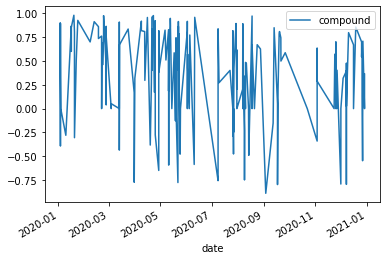

In [57]:
user = "bobbyclee"
tweets_analysis[tweets_analysis["user"] == user][["date", "compound"]].plot(x = "date")

In [48]:
?pd.DataFrame.plot